# Desarrollo trabajo N°1. Fundamentos de Machine Learning
### Felipe Cáceres Caro

##### 1.a) Utilizando el conjunto de datos MNIST, Fashion MNIST o Colored MNIST construya un clasificador en k-NN. 

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


# (X, y), _ = mnist.load_data()
# (X, y), _ = fashion_mnist.load_data()

In [2]:
(X, y), _ = fashion_mnist.load_data()

In [3]:
# Ver la cantidad de etiquetas contenidas en los datos
etiquetas_unicas = np.unique(y)
conteos = np.bincount(y)
print("Número de tiquetas:", etiquetas_unicas)
print("Cantidad valores por etiqueta:", conteos)

Número de tiquetas: [0 1 2 3 4 5 6 7 8 9]
Cantidad valores por etiqueta: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


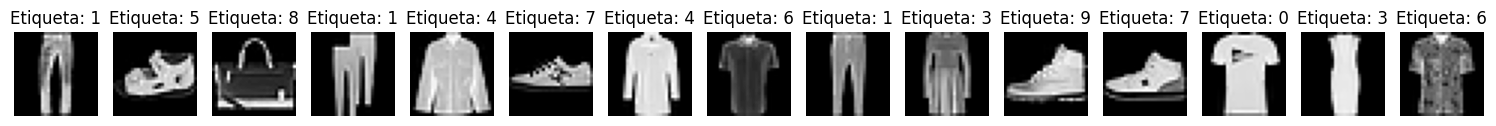

In [4]:
# Número de imágenes a mostrar
num_imagenes = 15

# Seleccionar índices aleatorios
indices = np.random.choice(len(X), num_imagenes, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, num_imagenes, i + 1)
    plt.imshow(X[idx], cmap='gray')
    plt.title(f"Etiqueta: {y[idx]}")
    plt.axis('off')
plt.tight_layout() 
plt.show()

In [5]:
# Mostrar la forma original de los datos
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (60000, 28, 28)
Forma de y: (60000,)


* Como vemos en el codigo anterior tenemos que los datos Fashion MNIST tienen una forma de 28 x 28 píxeles (matriz bidimensional). A partir de esto, K-NN no trabaja directamente con matrices, sino con vectores, es por esto que se hace necesario hacer un preprocesamiento a los datos, convertir cada imagen de 28 x 28 a un vector unidimensional de tamaño 784, con esto el modelo puede calcular las distancias entre las muestras en un espacio de 784 dimensiones.
* Posteriormente, se procede a normalizar los valores de los píxeles, ya que al no normalizar el modelo estará confeccionado por características con valores muy grandes pudiendo sesgar el modelo y reducir su rendimiento, sobre todo al trabajar con un algoritmo que depende de distancias. A partir de esto se procede a normalizar en un intervalo de [0, 1] pudiendo escalar los valores oiriginales de [0, 255].

Como vemos a continuación: 

In [6]:
# Preparar los datos
X = X.reshape(X.shape[0], -1)  # Aplanar las imágenes de 28x28 a 784
X = X.astype('float32') / 255.0  # Normalizar los valores de pixel a [0, 1]
# Mostrar la forma de los datos
print("Forma de X:", X.shape)

Forma de X: (60000, 784)


In [9]:
# Separar los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=123,
    stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (48000, 784), Test: (12000, 784)


In [10]:
# Definir y entrenar el modelo k-NN - Preprocesado de datos
knn = KNeighborsClassifier(
    n_neighbors=3,       # ej: prueba 3, 5, 7, 9...
    metric='minkowski',  # 'euclidean', 'manhattan', ...
    p=2,                 # para Minkowski: p=1 manh., p=2 eucl.
    weights='uniform'    # 'distance' permite ponderar por distancia
)

In [11]:
knn.fit(X_train, y_train) # Entrenamiento
y_pred = knn.predict(X_test) # Predecir en el conjunto de prueba

# Evaluar el modelo
print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy en test: 0.85525

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82      1200
           1       0.98      0.97      0.98      1200
           2       0.73      0.80      0.76      1200
           3       0.91      0.86      0.88      1200
           4       0.78      0.74      0.76      1200
           5       0.99      0.82      0.90      1200
           6       0.68      0.60      0.64      1200
           7       0.88      0.95      0.91      1200
           8       0.98      0.95      0.97      1200
           9       0.89      0.97      0.93      1200

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.85     12000
weighted avg       0.86      0.86      0.85     12000



Comentarios de los resultados

Como podemos observar de los resultados del reporte de clasificación, nuestro modelo esta clasificando y entregando un accuracy del 85.53% de las muestras en el conjunto de prueba. Considerando que es un modelo inicial y no se le realizaron optimizaciones a los parametros, esta entregando un buen resultado inicial. 

Luego tenemos el reporte de clasificación donde podemos observar: 
1. Para 4 clases el modelo identifica una proporcion de predicciones correctas menores al 90%, siendo las clases (0, 2, 4 y 6), la clase 2 y 6 son las que entregan menor precisión de todas. 
2. El Recall nuevamente tenemos que la proporcion de muestras correctamente clasificadas son bajas para la clase 6 particularmente, ya que este entrega un resultado del 0.6. 
3. Al observar el F1-score que corresponde a la media armónica entre precisión y recall, tenmos que nuevamente la clase 6 es la que peor resultados entrega con un 0.64, confirmandose que es la clase más problematica en nuestro modelo. 

A partir de lo anterior, la clase 6 es la que el modelo tiene dificultades para distinguir esta clase de otras. Lo cual podría deberse a que comparte características similares con otra clase o que una representación es insuficiente en el espacio de características.  

##### 1.b)  Grafique el espacio de características de las frases en 2D usando tSNE y analice la existencia de clusters relevantes. Comente como este espacio se ve afectado por las features utilizadas.

In [2]:
# Importamos la librería para la reducción de dimensionalidad
from sklearn.manifold import TSNE

In [13]:
# Reducimos el tamaño del conjunto de datos para t-SNE
n_samples = 2000 # número de muestras consideradas
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]

In [14]:
# Aplicamos t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, perplexity=30.0, 
            early_exaggeration=12.0, learning_rate='auto', max_iter=None, 
            n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', 
            metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', 
            angle=0.5, n_jobs=None, n_iter='deprecated')
X_tsne = tsne.fit_transform(X_subset)

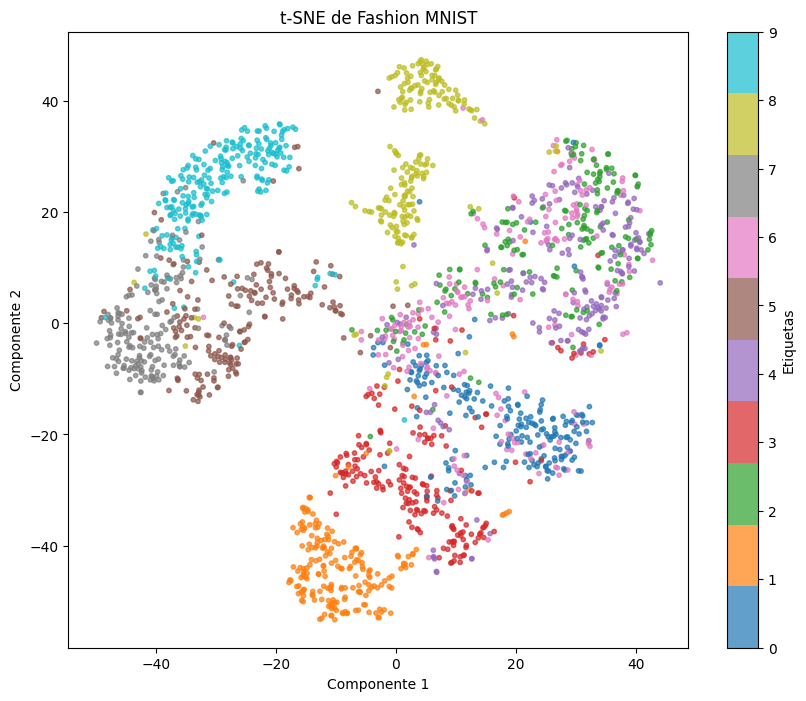

In [15]:
# Visualizamos los datos en 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Etiquetas')
plt.title('t-SNE de Fashion MNIST')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

Del gráfico anterior, podemos mencionar que: 

* Algunos cluster estan claramente separados y bien definidos como son las etiquetas [1, 7, 8, 9], esto indica que los valores de los píxeles se pueden discriminar facilmente, pudiendo ser identificados los patrones visuales. 
* Hay algunos cluster con un solapamiento considerable entre las clases como son las etiquetas [0, 3, 4, 5, 6], lo que indica que las caracteristicas originales no son facilmente distinguidas, pudiendose clasificar por ejemplo, un vestido como abrigo lo cual sería erroneo. 
* Los cluster estan relativamente agrupados, lo que indica que el algoritmo logro capturar la estructura de los datos. Sin embargo, de igual manera hay algunos clusters que tienen mas ruido que otros, pudiendose identificar ciertos puntos dispersos en el espacio. 

##### 1.c)  Pruebe distintas configuraciones para el modelo, incluyendo distintas metricas de distancia, y reporte el rendimiento en un conjunto de prueba. Comente los resultados. 

In [ ]:
# definir y entrenar el modelo k-NN - Preprocesado de datos
knn_1 = KNeighborsClassifier(
    n_neighbors=3,       # ej: 3, 5, 7, 9...
    metric='minkowski',  # 'euclidean', 'manhattan', 'chebyshev', 'minkowski'
    p=3,                 # p=1 manh, p=2 eucl.
    weights='uniform'    # 'distance' permite ponderar por distancia
)

In [65]:
knn_1.fit(X_train, y_train) # Entrenamiento
y_pred = knn_1.predict(X_test) # Predecir en el conjunto de prueba

# Evaluar el modelo
print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy en test: 0.8376666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80      1200
           1       0.98      0.96      0.97      1200
           2       0.70      0.80      0.75      1200
           3       0.90      0.85      0.87      1200
           4       0.78      0.72      0.75      1200
           5       0.99      0.72      0.83      1200
           6       0.66      0.60      0.63      1200
           7       0.84      0.94      0.89      1200
           8       0.97      0.94      0.96      1200
           9       0.86      0.97      0.91      1200

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



In [66]:
# Reducimos el tamaño del conjunto de datos para t-SNE
n_samples = 2000 # número de muestras consideradas
X_subset_1 = X_train[:n_samples]
y_subset_1 = y_train[:n_samples]

In [67]:
# Aplicamos t-SNE para reducir a 2 dimensiones
tsne_1 = TSNE(n_components=2, perplexity=30.0, 
            early_exaggeration=12.0, learning_rate='auto', max_iter=None, 
            n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', 
            metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', 
            angle=0.5, n_jobs=None, n_iter='deprecated')
X_tsne_1 = tsne_1.fit_transform(X_subset_1)

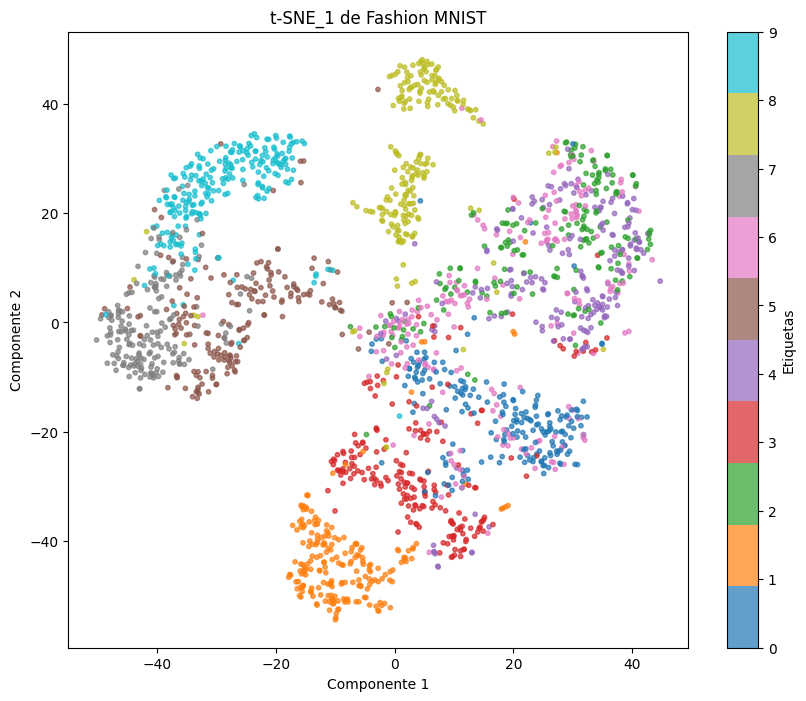

In [68]:
# Visualizamos los datos en 2D
plt.figure(figsize=(10, 8))
scatter_1 = plt.scatter(X_tsne_1[:, 0], X_tsne_1[:, 1], c=y_subset_1, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter_1, label='Etiquetas')
plt.title('t-SNE_1 de Fashion MNIST')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

Ahora probamos con la distancia manhattan

In [81]:
# definir y entrenar el modelo k-NN - Preprocesado de datos
knn_2 = KNeighborsClassifier(
    n_neighbors=4,       # ej: prueba 3, 5, 7, 9...
    metric='manhattan',  # 'euclidean', 'manhattan', ...
    p=1,                 # para Minkowski: p=1 manh., p=2 eucl.
    weights='distance'    # 'distance' permite ponderar por distancia
)

In [82]:
knn_2.fit(X_train, y_train) # Entrenamiento
y_pred_2 = knn_2.predict(X_test) # Predecir en el conjunto de prueba

# Evaluar el modelo
print("Accuracy en test:", accuracy_score(y_test, y_pred_2))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_2))

Accuracy en test: 0.8664166666666666

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1200
           1       0.99      0.97      0.98      1200
           2       0.76      0.80      0.78      1200
           3       0.90      0.88      0.89      1200
           4       0.78      0.77      0.77      1200
           5       0.99      0.89      0.94      1200
           6       0.66      0.61      0.63      1200
           7       0.91      0.95      0.93      1200
           8       0.98      0.96      0.97      1200
           9       0.92      0.97      0.94      1200

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



* El porcentaje total de predicciones correctas es de 87% siendo el más alto obtenido de los modelos anteriores.
* Tambien, tanto el macro avg como el weighted avg sean consistentes y altos (0.87) es una muy buena señal de mejor rendimiento.

In [87]:
# Reducimos el tamaño del conjunto de datos para t-SNE
n_samples = 2000 # número de muestras consideradas
X_subset_2 = X_train[:n_samples]
y_subset_2 = y_train[:n_samples]

In [90]:
# Aplicamos t-SNE para reducir a 2 dimensiones
tsne_2 = TSNE(n_components=2, perplexity=30.0, 
            early_exaggeration=12.0, learning_rate='auto', max_iter=None, 
            n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', 
            metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', 
            angle=0.5, n_jobs=None, n_iter='deprecated')
X_tsne_2 = tsne_2.fit_transform(X_subset_2)

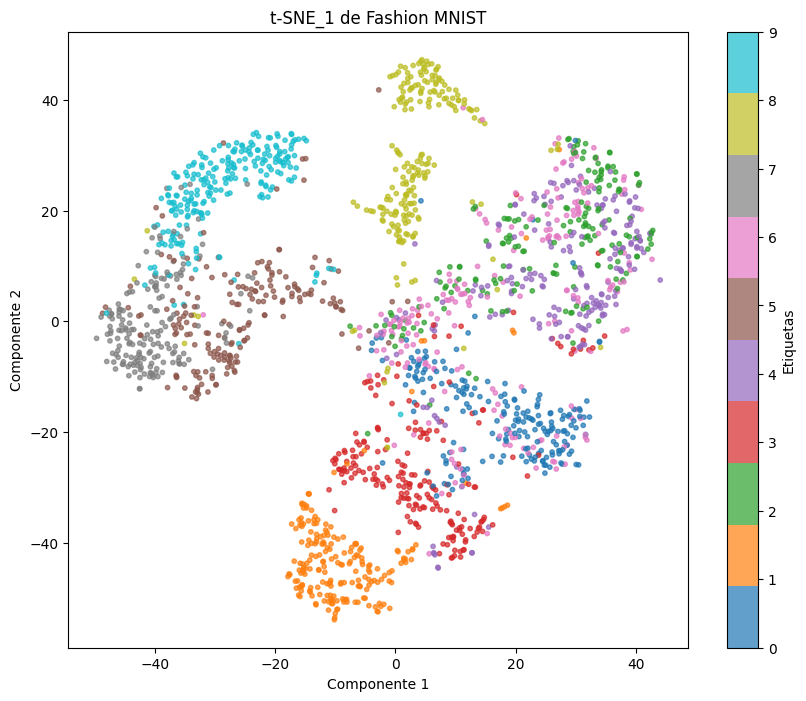

In [91]:
# Visualizamos los datos en 2D
plt.figure(figsize=(10, 8))
scatter_2 = plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1], c=y_subset_2, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter_2, label='Etiquetas')
plt.title('t-SNE_1 de Fashion MNIST')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

Del gráfico anterior, podemos mencionar que: 

* Podemos ver que sigue habiendo una estructura en las predicciones obtenidas las cuales estan mejor definidas en las fronteras para las etiquetas [1, 7, 8, 9]. 
* Se siguen observando cluster con solapamiento etiquetas [0, 3, 4, 5, 6], sin embargo en las fronteras se encuentran más definidas que los 2 modelos anteriores. 

##### 2.a)  Entrene diversos modelos de arboles de decisión, modificando sus hiper parámetros (profundidad máxima, criterio de split, y otros), incluyendo dentro de estos un árbol entrenado utilizando validación cruzada, como vimos en el ejemplo en clases. Mida el rendimiento de cada uno de estos modelos en un conjunto de test independiente. 

In [18]:
# Importamos librerias
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt


In [30]:
# Ubicacion dataset
ubicacion = 'C:/Users/Felipe/Desktop/Diplomado Machine Learning Aplicado/02.Fundamentos de machine learning/Tarea 1/' 
# Cargamos el dataset
df = pd.read_csv(ubicacion + 'water_potability.csv')
df.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

 Descripción de las variables: 

| Variable                    | Descripción                                                                                                                                                                                                                                 |
|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Valor del pH (pH)              | El pH es un parámetro importante para evaluar el equilibrio ácido-base del agua, indicando su estado ácido o alcalino. La OMS recomienda un rango de 6,5 a 8,5 para agua potable.                      |
| Dureza (Hardness)                      | Causada principalmente por sales de calcio y magnesio disueltas, la dureza determina la capacidad del agua para precipitar jabón y depende del tiempo de contacto con materiales geológicos.           |
| Sólidos totales disueltos (Solids) | Mide la cantidad de minerales y sales disueltas en el agua, como potasio, calcio, sodio, bicarbonatos, cloruros, magnesio y sulfatos. Altos valores de TDS indican agua muy mineralizada; el límite deseable es 500 mg/l y el máximo 1000 mg/l. |
| Cloraminas (Chloramines)                  | Compuestos formados al añadir amoniaco al cloro durante la desinfección del agua. Niveles de hasta 4 mg/L se consideran seguros para el consumo humano.                                               |
| Sulfatos (Sulfate)                    | Sustancias naturales presentes en minerales, suelos y rocas, así como en el aire y alimentos. En agua dulce suelen encontrarse entre 3 y 30 mg/L, aunque pueden llegar a 1000 mg/L en ciertas zonas.   |
| Conductividad (Conductivity)               | Mide la capacidad del agua para conducir electricidad, determinada por la concentración de iones y sólidos disueltos. La OMS recomienda un valor máximo de 400 μS/cm.                                 |
| Carbono_orgánico (Organic_carbon)            | El carbono orgánico total (COT) proviene de materia orgánica natural y fuentes sintéticas. Es una medida de la cantidad total de carbono en compuestos orgánicos. El límite recomendado es <2 mg/L en agua tratada y <4 mg/L en agua de origen. |
| Trihalometanos (Trihalomethanes)             | Compuestos químicos que pueden formarse en el agua tratada con cloro. Su concentración depende de la materia orgánica, la cantidad de cloro y la temperatura. Niveles de hasta 80 ppm se consideran seguros. |
| Turbidez (Turbidity)                    | Mide la cantidad de materia sólida en suspensión, afectando la transmisión de luz en el agua. Un valor inferior a 5,00 NTU es el recomendado por la OMS para agua potable.                            |
| Potabilidad (Potability)                 | Indica si el agua es segura para consumo humano: 1 significa potable y 0 no potable.                                                                                                                 |


In [31]:
# Visualización estadística de los datos brutos
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

A partir de las estadísticas podemos afirmar: 

1. Hay variables que tienen datos faltantes (pH, Sulfate y Trihalomethanes) identificando un total de 3276 datos por variable.
2. El pH promedio es 7.08, con valores entre 6.04 y 8.13, esto indica que el agua es neutra o ligeramente alcalina.
3. La variable dureza del agua (Hardness) tiene una media de 196.37, y el rango percentil 25% y 75% se encuentran entre 176 y 217, esto podría indicar que las aguas analizadas son erlativamente duras.
4. Los sólidos disueltos totales (Solids) presentan una media alta (22,127) y una gran dispersión (std=8768.570828), con valores que van desde 320 hasta más de 56,000.
5. Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes y Turbidity muestran medias y rangos bajos que se podrían considerar razonables, aunque algunas variables como Solids y Conductivity tienen alta variabilidad.
6. La variable Potability es del tipo binaria, con una media de 0.397 lo que podría indicar que el 40% de las muestras son potables y el 60% no lo son (esto lo comprobaremos más adelante con graficos).
7. No se observan valores negativos para las variables medidas (los cuales en caso de evidenciar podrían clasificarse como outlier).

In [32]:
# Visualización de los tipos de datos a trabajar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [33]:
# Visualización de los datos nulos
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Las variables pH, Sulfate y Trihalomethanes presentan valores nulos. Hay que considerar esto a la hora de aplicar un algoritmo de clasificación. 

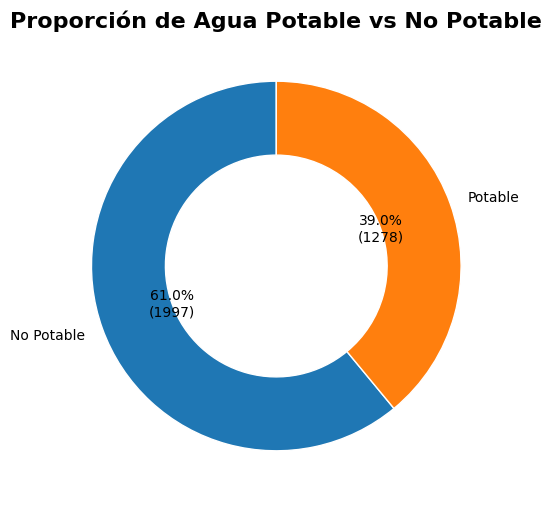

In [34]:
# Contamos la cantidad de clases contenidas en la variable potability
counts = df["Potability"].value_counts().sort_index()
labels = ["No Potable", "Potable"]

# Creamos el gráfico pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*sum(counts))})",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
plt.title("Proporción de Agua Potable vs No Potable", fontsize=16, weight="bold")
plt.show()

Como se observo en las estadísticas descriptivas, la variable "Porosity" es clasificada en potable y no potable con un total de 1997 y 1278 valores respectivamente, siendo un dataset desbalanceado. 

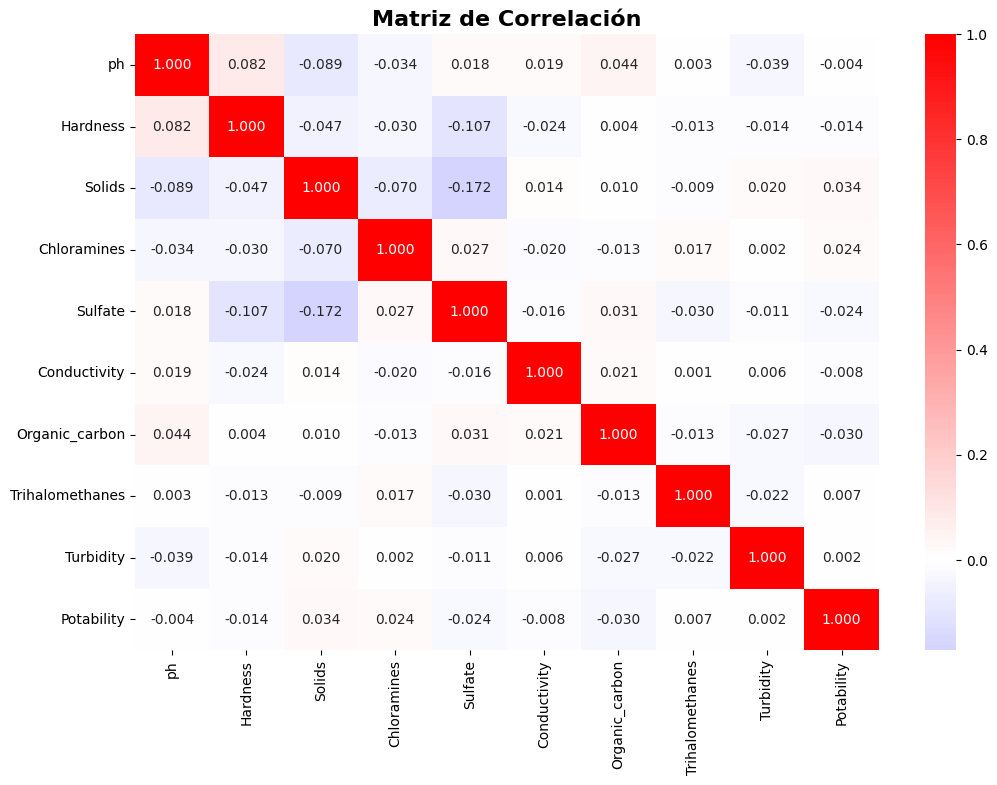

In [35]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".3f", cmap="bwr", center=0)
plt.title("Matriz de Correlación", fontsize=16, weight="bold")
plt.show()

A partir de la matriz de correlación podemos observar: 

1. La mayoría de las correlaciones entre variables son bajas cercanas a 0, lo que indica que no hay relaciones lineales entre la mayoría de las variables.
2. No se observan valores cercanos a 1 o -1, esto indica que no hay variables que se encuentren fuertemente correlacionadas positiva, ni negativamente.
3. Conductividad y Sulfato tienen una correlación negativa moderada (-0.172), lo que indica que a mayor conductividad suele haber menor concentración de sulfato, y lo mismo ocurre con las variables Sulfato y Dureza (-0.107), mientras el sulfato aumenta, la dureza tiende a disminuir.

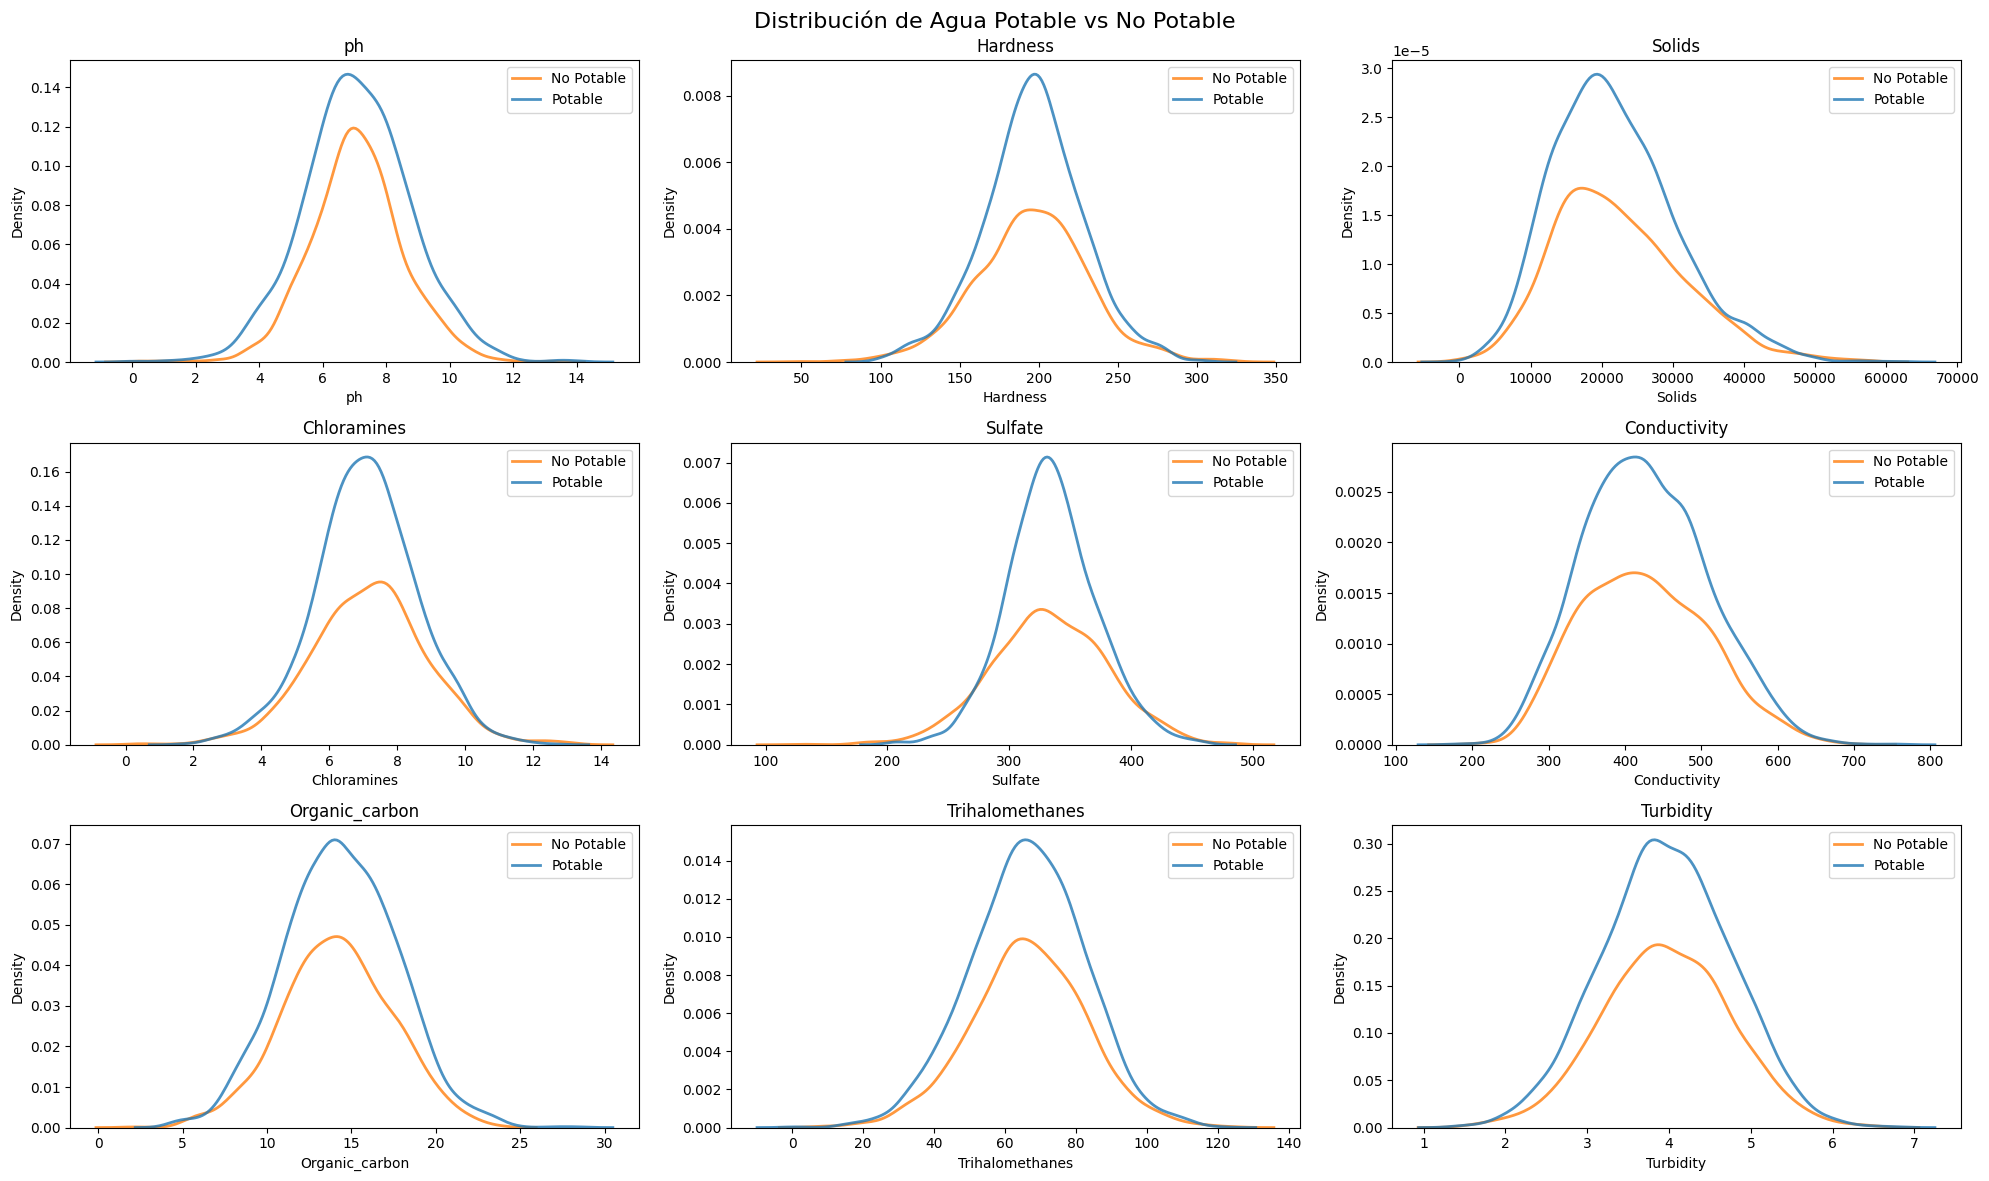

In [36]:
# Creamos un grafico con cuadriculas de 3x3
plt.subplots(3, 3, figsize=(20, 12))
plt.suptitle('Distribución de Agua Potable vs No Potable', fontsize=16)

# Bucle para cada variable 
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1) #posicionamos los graficos

    sns.kdeplot(data=df, x=col, hue='Potability',
                fill=False, alpha=0.8, linewidth=2) # Crea,mos un grafico de densidad
    plt.title(col)

    if i != -1: 
        plt.legend(['No Potable', 'Potable'])
        plt.xlabel(col)

plt.tight_layout()
plt.show()

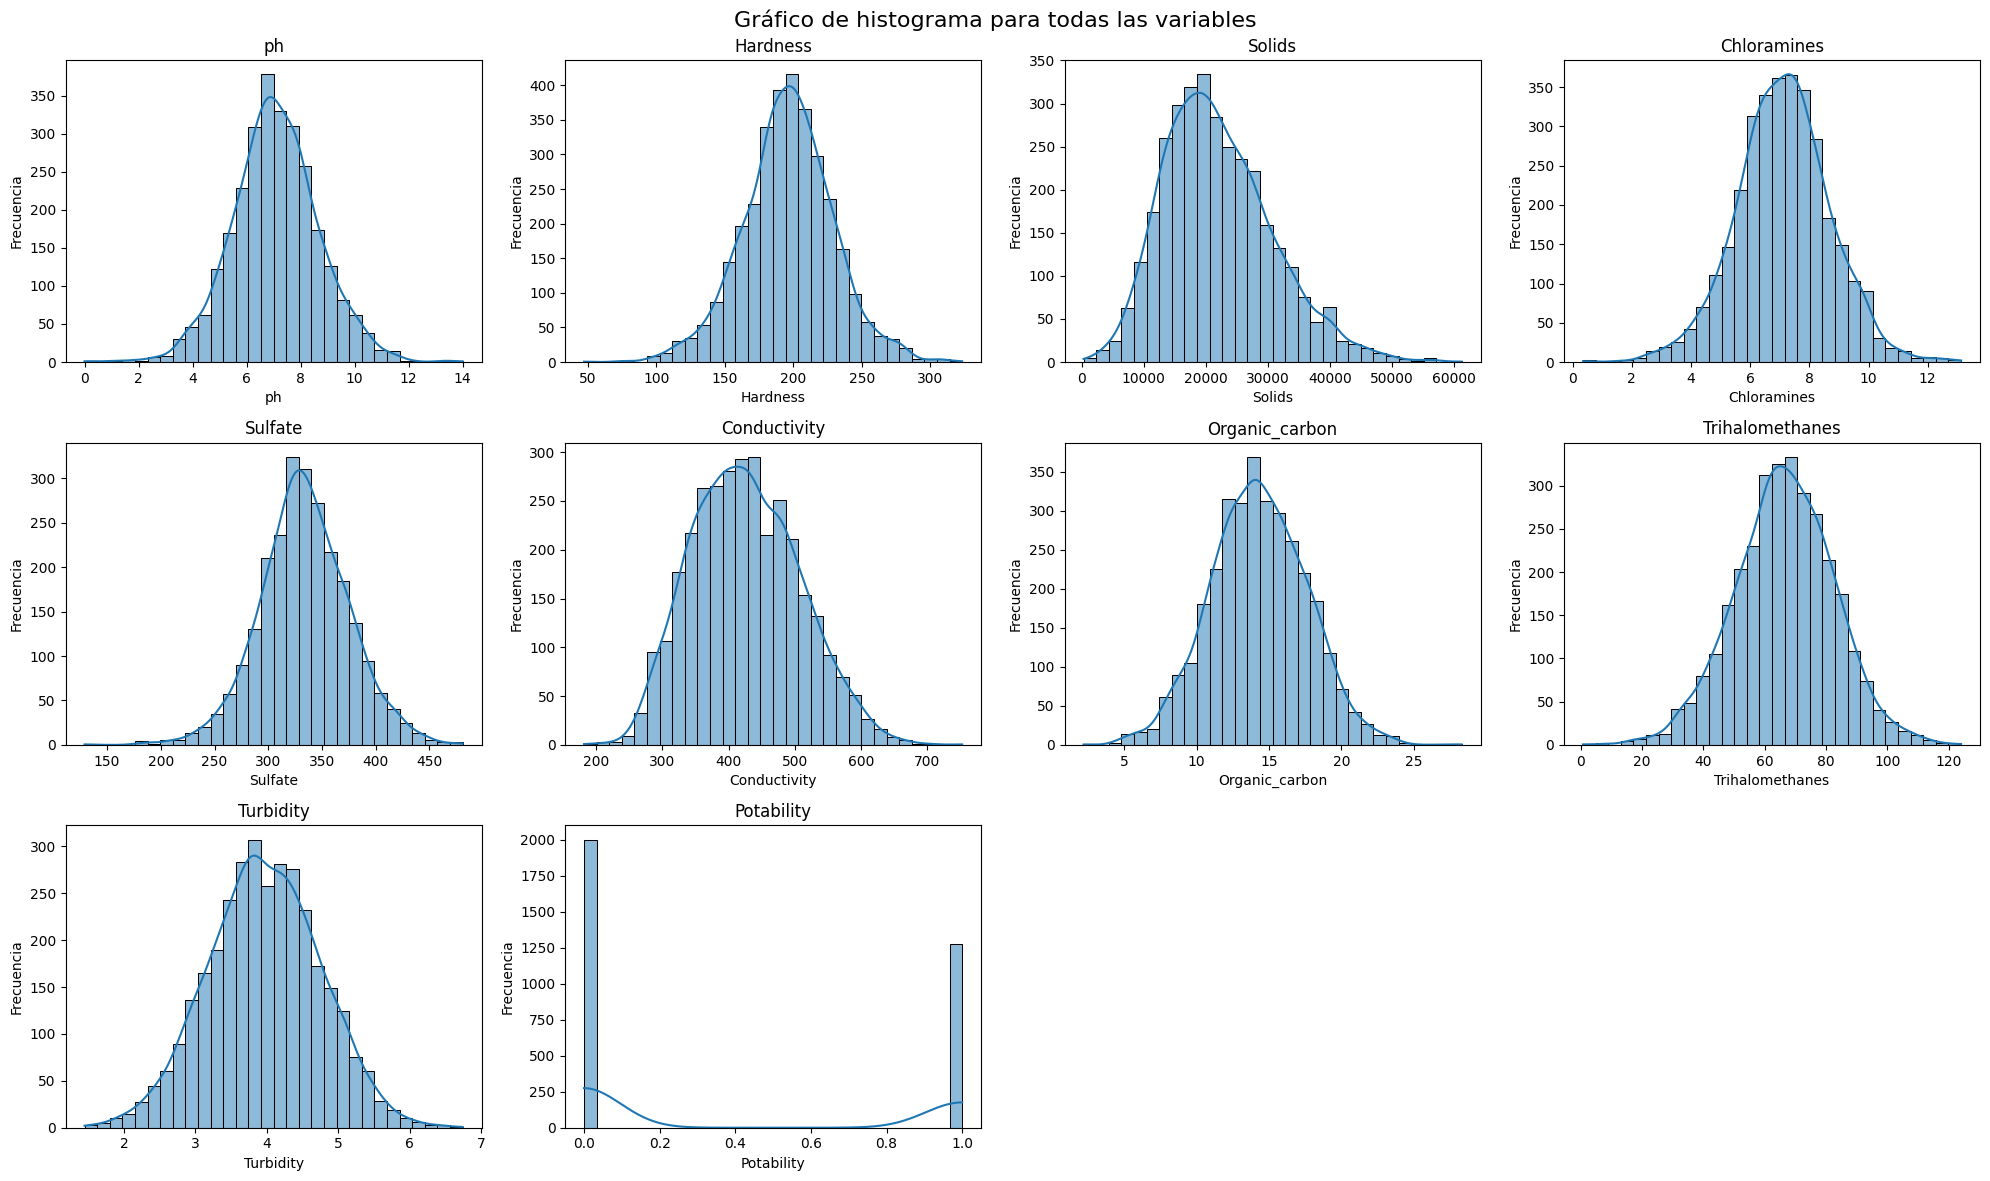

In [37]:
# Confeccionamos un grafico de histograma para todas las variables, con esto podremos analizar las distribuciones de todas.
plt.figure(figsize=(20, 12))
plt.suptitle('Gráfico de histograma para todas las variables', fontsize=16)

for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)  

    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

* De los graficos anteriores podemos observar que siguen distribuciones aproximadamente normales las variables pH, Hardness, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes y Turbidity. 
* La variable Solids tiene una distribución ligeramente sesgada hacia la derecha.

In [39]:
""" 
Debido a que las variables presentan distribuciones aproximadamente normales podemos rreemplazar los valores nulos por la media de cada variable (pH y Sulfate) 
sin embargo para la variable Trilhalomethanes (THM) dado que presenta una distribución sesgada se realiza con la mediana. 
"""
df["ph"].fillna(df["ph"].mean(), inplace=True)
df["Sulfate"].fillna(df["Sulfate"].mean(), inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].median(), inplace=True)

print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


C:\Users\Felipe\AppData\Local\Temp\ipykernel_7320\3355710748.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ph"].fillna(df["ph"].mean(), inplace=True)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_7320\3355710748.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [40]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.390110  
std       80.824064        3.308162        15.769958     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [41]:
# Separamos los datos en variables predictoras y variable objetivo
X = df.drop(columns=["Potability"]).values
y = df["Potability"].values

In [42]:
# Separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state = 3)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (982, 9)
X_test :  (2294, 9)
y_train :  (982,)
y_test :  (2294,)


In [43]:
import numpy as np

# Normalizamos los datos 
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)

X_train = (X_train - x_train_min) / (x_train_max - x_train_min)
X_test = (X_test - x_train_min) / (x_train_max - x_train_min)

In [61]:
# Implementamos el clasificador de Decision Tree sin restricciones
# Llamamos a la libreria
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

tree_basic = DecisionTreeClassifier(max_depth = 3)
tree_basic.fit(X_train, y_train)
pred_basic = tree_basic.predict(X_test)

print(f'Confusion matrix:\n {metrics.confusion_matrix(y_test, pred_basic)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, pred_basic)}')
print(f'Max depth: {tree_basic.get_depth()}')
print(f'Number of leaves: {tree_basic.get_n_leaves()}')
print(f'Number of nodes: {tree_basic.tree_.node_count}')

# Métricas adicionales
print(f'\nClassification Report:')
print(metrics.classification_report(y_test, pred_basic))
print(f'Precision: {metrics.precision_score(y_test, pred_basic):.4f}')
print(f'Recall: {metrics.recall_score(y_test, pred_basic):.4f}')
print(f'F1-score: {metrics.f1_score(y_test, pred_basic):.4f}')

Confusion matrix:
 [[1098  311]
 [ 599  286]]
Accuracy: 0.6033129904097646
Max depth: 3
Number of leaves: 7
Number of nodes: 13

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1409
           1       0.48      0.32      0.39       885

    accuracy                           0.60      2294
   macro avg       0.56      0.55      0.55      2294
weighted avg       0.58      0.60      0.58      2294

Precision: 0.4791
Recall: 0.3232
F1-score: 0.3860


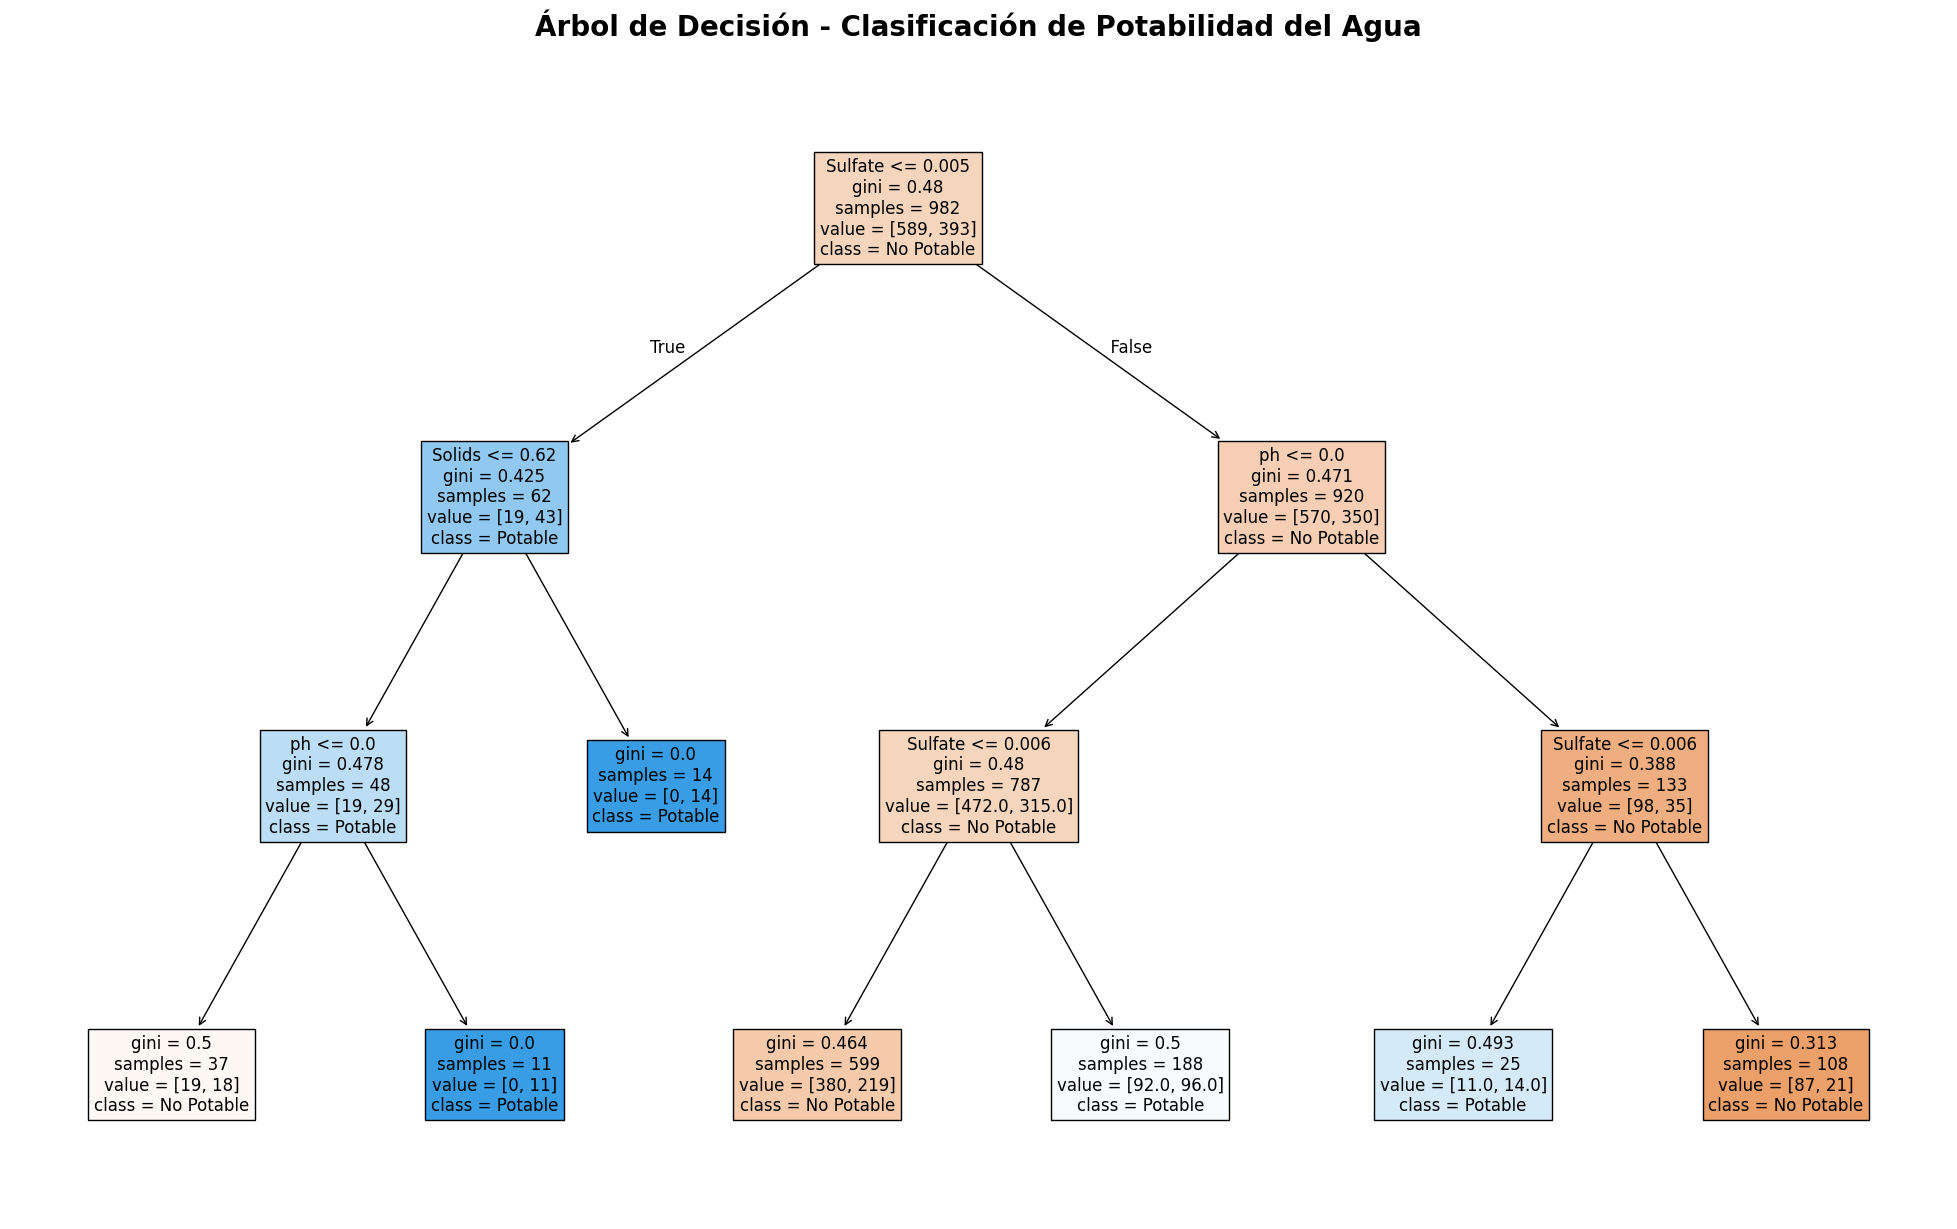

In [ ]:
# Visualizamos el arbol de decisión
plt.figure(figsize=(25, 15))
plot_tree(tree_basic,
          feature_names = df.columns.to_list()[:-1], 
          class_names=["No Potable", "Potable"],  
          filled=True,
          fontsize=12)  

plt.title("Árbol de Decisión - Clasificación de Potabilidad del Agua", 
          fontsize=20, fontweight='bold', pad=20)
plt.show()

**Ahora probamos otros parametros para mejorar la predicción del modelo.**

In [90]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# Separamos los datos en variables predictoras y variable objetivo
A = df.drop(['Potability', 'Hardness', 'Solids', 'Sulfate', 'Conductivity'], axis=1)  # Voy a excluir estas vaiables
b = df['Potability']

print(f"\nForma final de X: {A.shape}")
print(f"Variables a considerar para el modelo: {list(A.columns)}")


Forma final de X: (3276, 5)
Variables a considerar para el modelo: ['ph', 'Chloramines', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [117]:
# separamos los datos en entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(A, b, train_size=0.3, random_state=3)

print(f"\nConjunto de entrenamiento: {X_train_2.shape}")
print(f"Conjunto de prueba: {X_test_2.shape}")


Conjunto de entrenamiento: (982, 5)
Conjunto de prueba: (2294, 5)


In [118]:
# Entrenamos un segundo modelo de Decision Tree integando otros parametros 
tree_basic_2 = DecisionTreeClassifier(max_depth=4, criterion='gini', 
                                      random_state=42)
tree_basic_2.fit(X_train_2, y_train_2)
pred_basic_2 = tree_basic_2.predict(X_test_2)
acc_basic_2 = accuracy_score(y_test_2, pred_basic_2)

print(f"Accuracy: {acc_basic_2:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_2, pred_basic_2))
print()

Accuracy: 0.6194
Confusion Matrix:
[[1331   78]
 [ 795   90]]



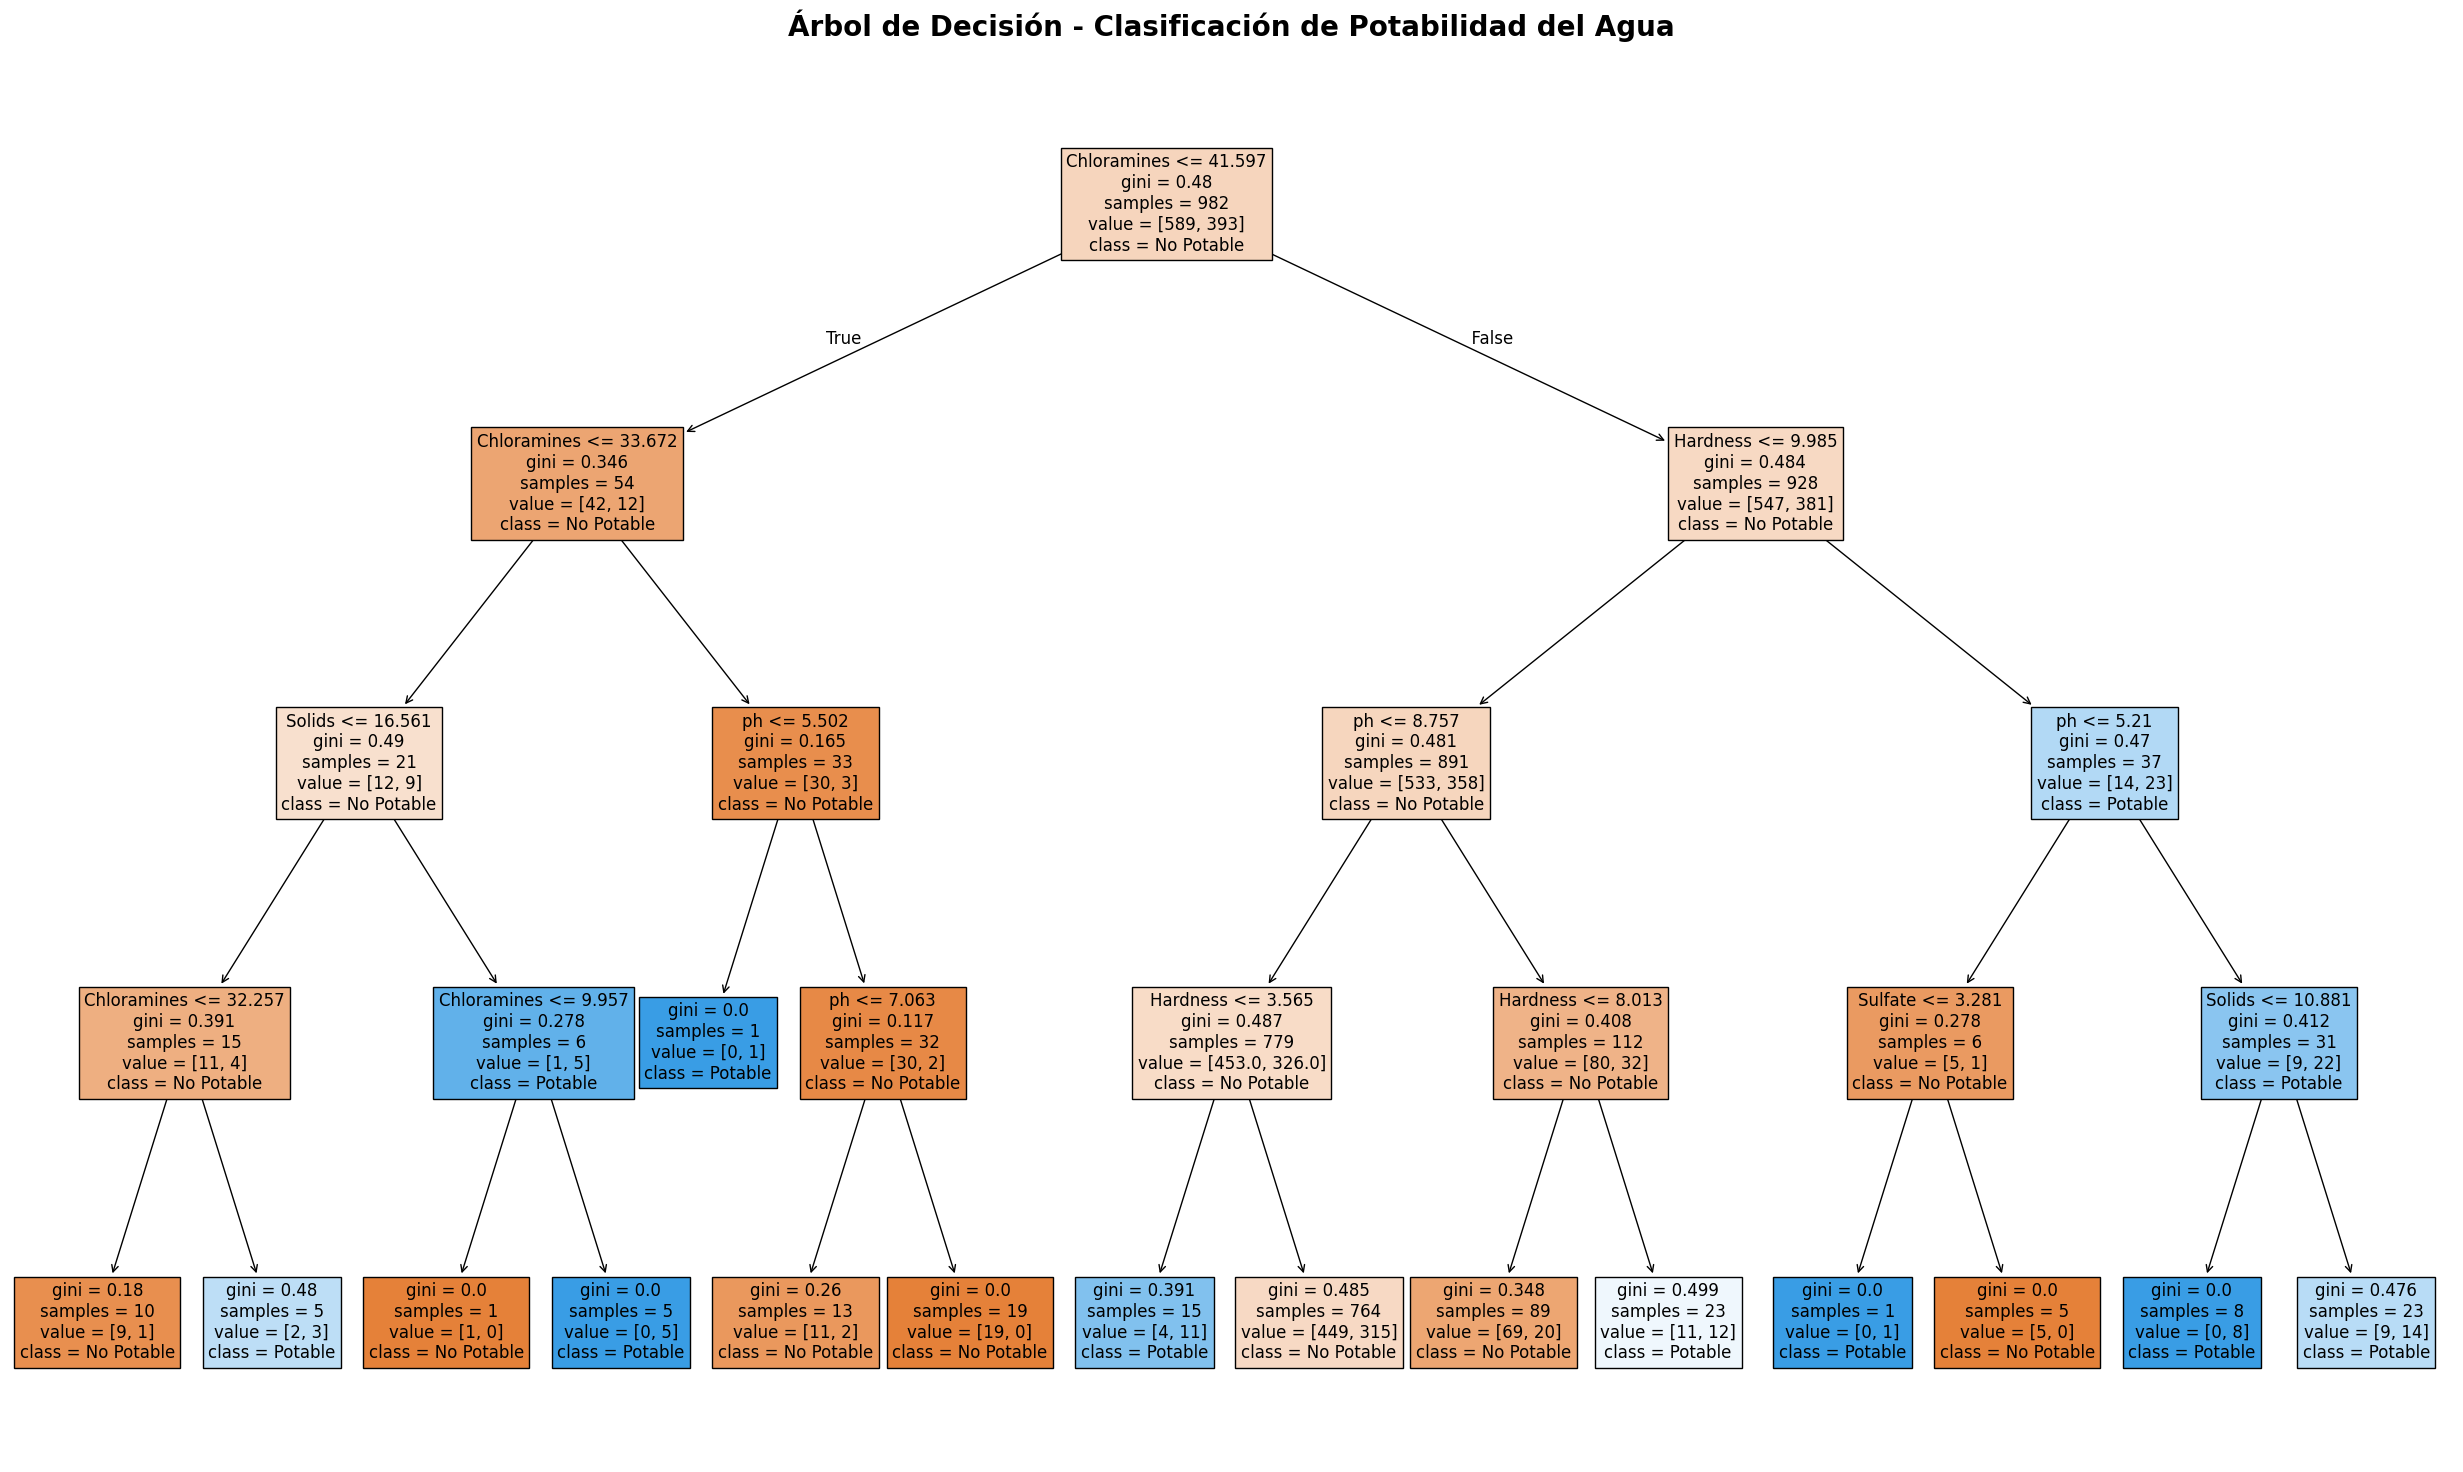

In [ ]:
# Visualizamos el arbol de decision
plt.figure(figsize=(25, 15))
plot_tree(tree_basic_2,
          feature_names = df.columns.to_list()[:-1], 
          class_names=["No Potable", "Potable"],  
          filled=True,
          fontsize=12)  

plt.title("Árbol de Decisión - Clasificación de Potabilidad del Agua", 
          fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [126]:
# separamos los datos en entrenamiento y prueba
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(A, b, train_size=0.3, random_state=3)

In [131]:
# Entenamos un tercer modelo de Decision Tree integando otros parametros
tree_basic_3 = DecisionTreeClassifier(
    max_depth=33,
    criterion='gini',
    min_samples_split=15,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)
tree_basic_3.fit(X_train_3, y_train_3)
pred_basic_3 = tree_basic_3.predict(X_test_3)
acc_basic_3 = accuracy_score(y_test_3, pred_basic_3)

print(f"Accuracy: {acc_basic_3:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_3, pred_basic_3))
print()

Accuracy: 0.5057
Confusion Matrix:
[[799 610]
 [524 361]]



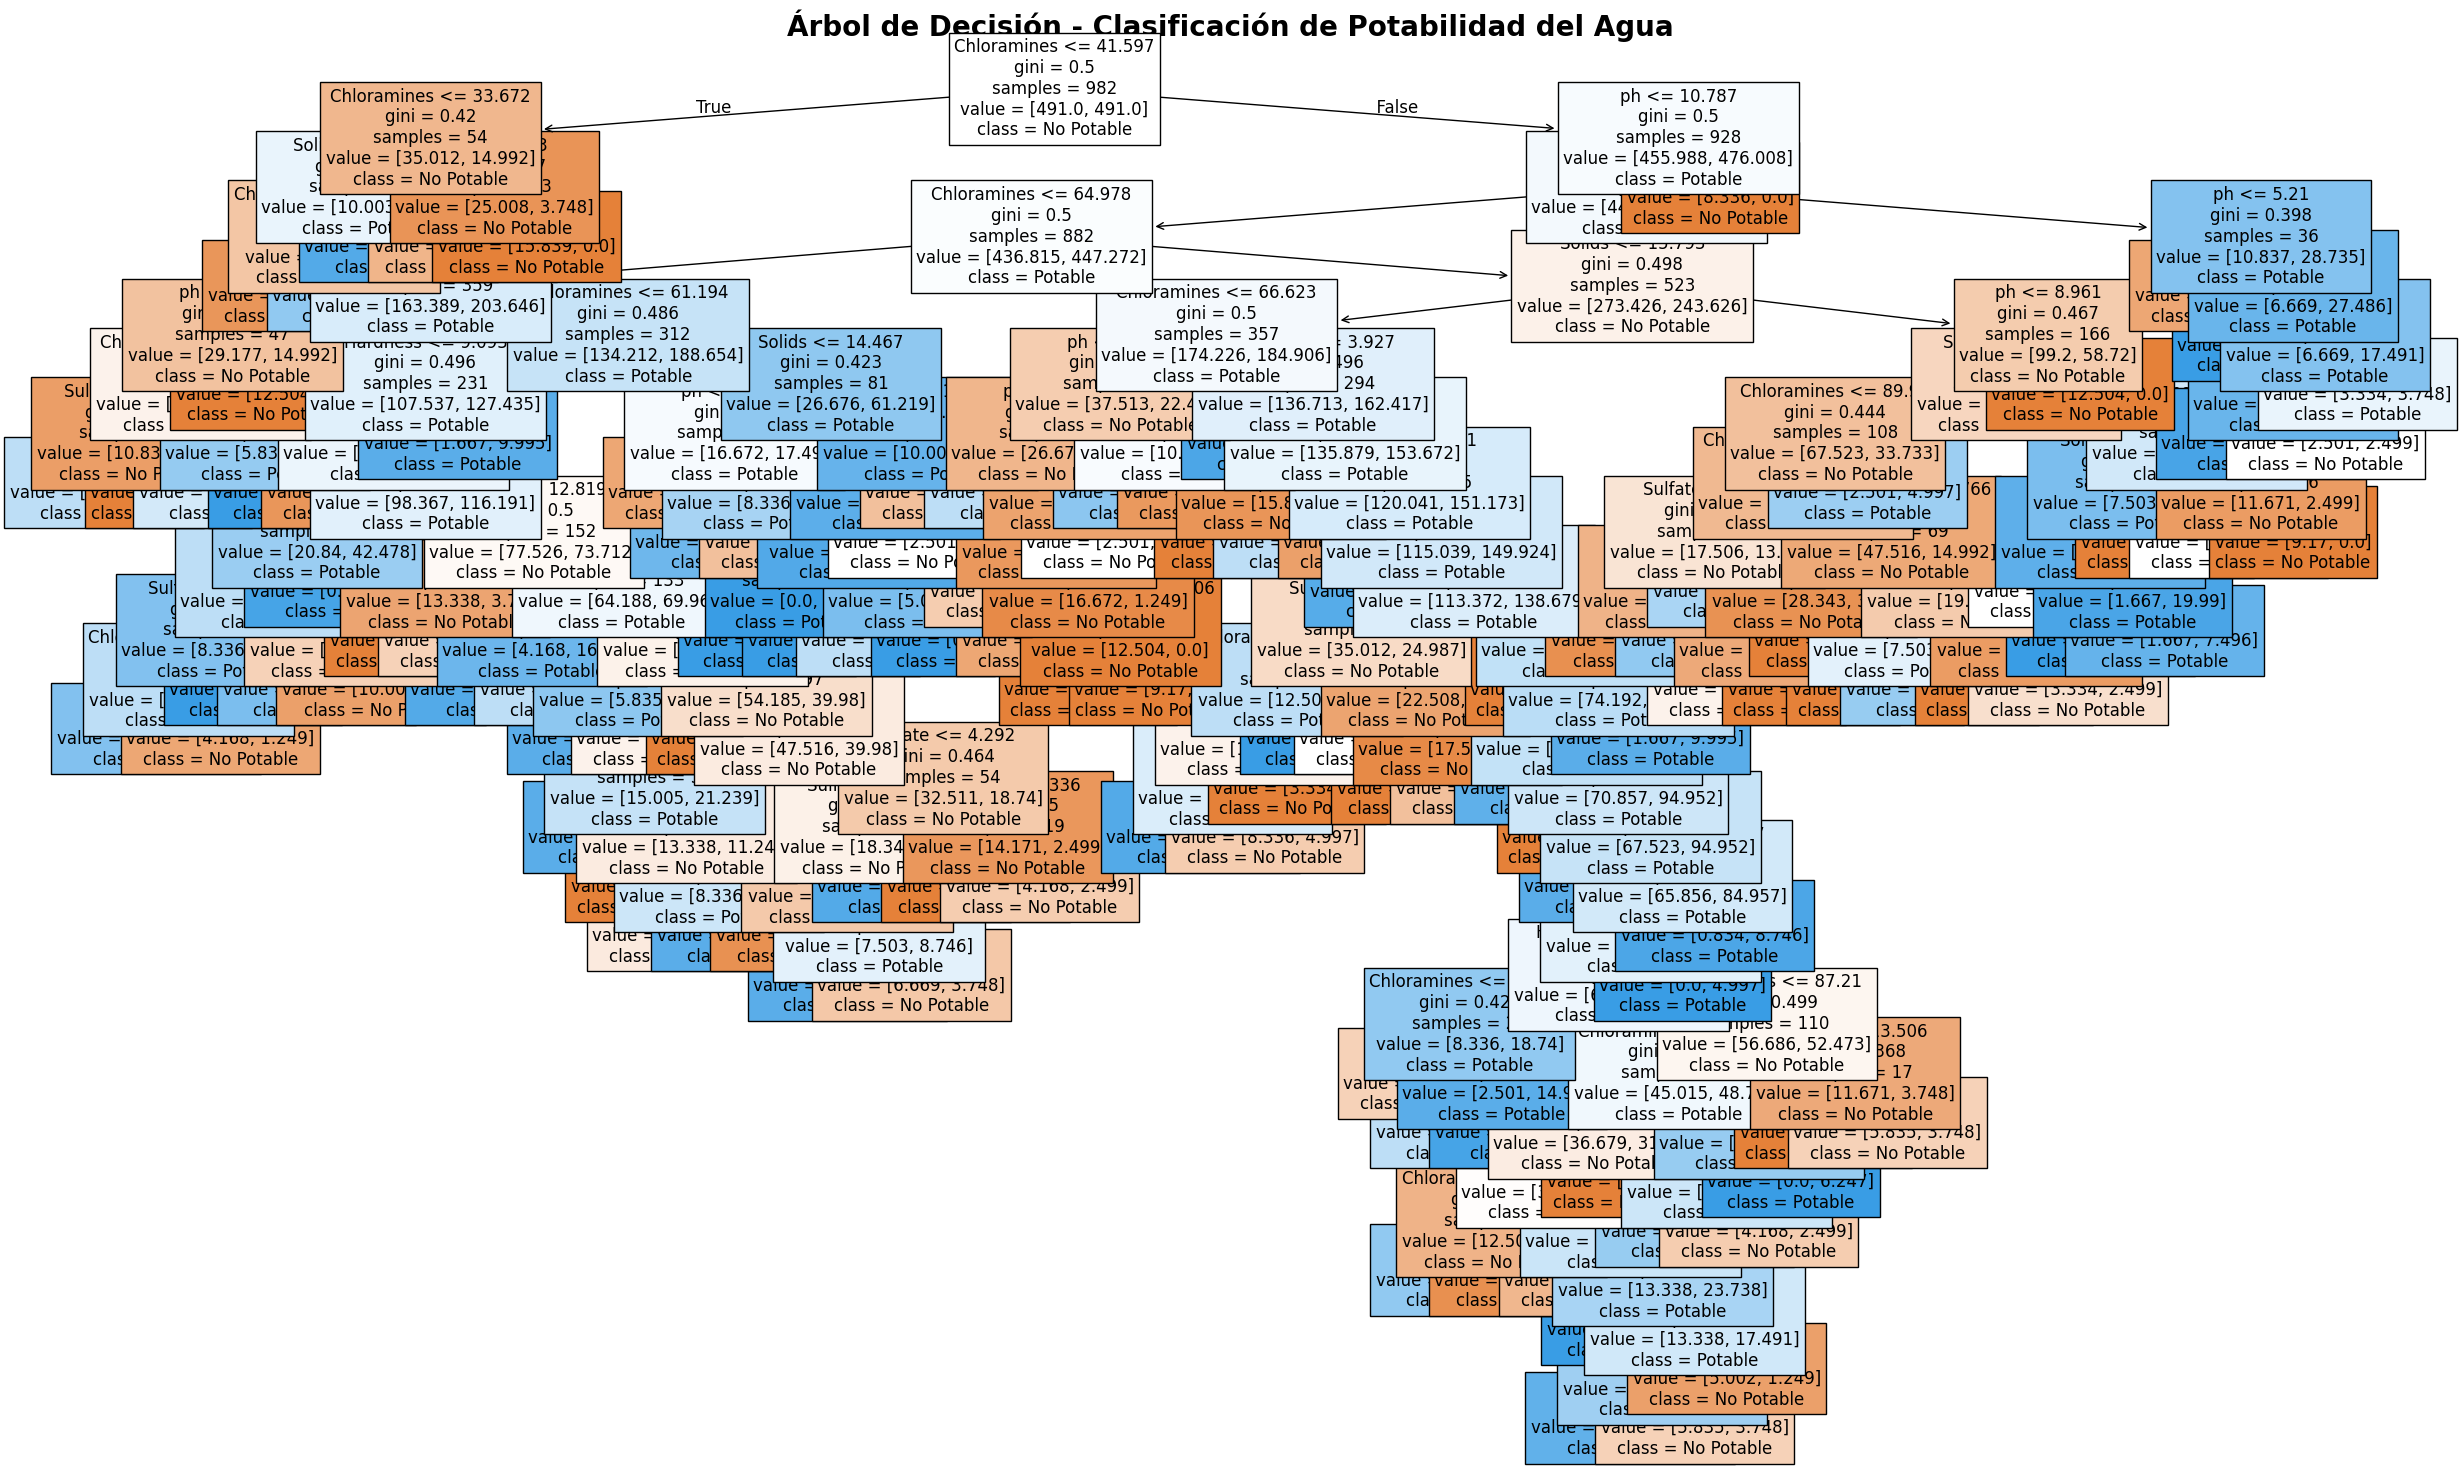

In [ ]:
# Visualizamos el arbol de decisipn
plt.figure(figsize=(25, 15))
plot_tree(tree_basic_3,
          feature_names = df.columns.to_list()[:-1], 
          class_names=["No Potable", "Potable"],  
          filled=True,
          fontsize=12)  

plt.title("Árbol de Decisión - Clasificación de Potabilidad del Agua", 
          fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [137]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Aplicamos validación cruzada estratificada 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Seleccionamos nuestos modelos a evaluar
models = {
    'Decision Tree': tree_basic,
    'Decision Tree_2': tree_basic_2,  
    'Decision Tree_3': tree_basic_3  
}

# Validación cruzada para mi segundo modelo
result = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_2, y_train_2,
                                 cv=cv, scoring='accuracy')
    result[name] = cv_scores
    print(f"{name} - CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Individual scores: {cv_scores}")

Decision Tree - CV Accuracy: 0.5784 (+/- 0.0548)
Individual scores: [0.58883249 0.60406091 0.56632653 0.53061224 0.60204082]
Decision Tree_2 - CV Accuracy: 0.5906 (+/- 0.0356)
Individual scores: [0.59390863 0.59898477 0.60714286 0.55612245 0.59693878]
Decision Tree_3 - CV Accuracy: 0.5376 (+/- 0.0420)
Individual scores: [0.55837563 0.55329949 0.50510204 0.55102041 0.52040816]


1. Todos los modelos están en el rango 53-59%.
2. Decision Tree_2 es el mejor con un 59.06% accuracy, tambien tiene una desviación estandar mas estable +/- 0.0356.
3. Decision Tree_3 es el peor con un 53.76% accuracy

##### 2.b)  Para cada uno de los modelos entrenados, encuentre las variables más relevantes para la clasificación. Compare las encontradas por cada modelo y discuta sobre tanto sobre la explicabilidad que estas proveen (si coincide con lo que uno esperaría), como sobre la existencia de un conjunto de variables que son relevantes en todos los modelos.

**La variable objetivo claramente es la potability, debio a que indica si el agua es segura para el consumo humano (1 = potable, 0 = no potable)**

**Se realizaron 3 modelos de arboles que los detallo a continuación:** 

1. Decision_tree = Para el primer split se consideraron todas las variables y la variable objetivo potability.
2. Decision_tree_2 = Para el segundo split se consideo la misma variable objetivo, pero variando la profundidad y excluyendo otras variables 'Hardness', 'Solids', 'Sulfate', 'Conductivity'. Ya que no aportan tanta información relevante según limites especificos e seguridad para consumo de la OMS. 
3. Decision_tree_3 = Para el tercer split se mantienen las mismas variables que en el segundo, pero se cambian otros parametros como el criterion, la profundidad, el split, otros. Entregando resultados intermedios entre los 3 modelos. 

**Variables predictoras que mantendría:**

* pH = Critico para determinar potabilidad (rango óptimo 6.5-8.5)
* Cloraminas = Importante para seguridad (≤4 mg/L es seguro)
* Carbono organico = Indicador clave de calidad (≤2 mg/L tratada, ≤4 mg/L origen)
* Trihalometanos = Compuestos quimicos criticos para seguridad (≤80 ppm)
* Turbidez = Medida directa de calidad del agua (≤5 NTU recomendado)

**Variables que consideraría remover o evaluar cuidadosamente:**

* Dureza = Aunque afecta propiedades del agua, no es determinante directo de potabilidad
* Sólidos = Puede ser redundante con conductividad
* Sulfatos = Menos critico para potabilidad inmediata
* Conductividad = Podría correlacionar fuertemente con solidos disueltos

Las variables con limites especificos obtenidos de la OMS serian las mas importantes para el modelo de potabilidad y los resultados si bien son bajos, se explicaria por el desbalanceo de los datos, cantidad de outlier y variabilidad de las variables objetivo que se seleccionaron. 

**Recomendación =** Probar otros metodos de ensamblaje como Random Forest, Gradient Boosting, otros, para mejorar la predicción. 

.

.

.

##### Bonus

In [160]:
# Importamos las librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,           # Número de árboles
    max_depth=5,               # Profundidad máxima
    max_features='sqrt',        # Features por árbol
    random_state=42,
    n_jobs=-1                   # Usar todos los cores
)

In [161]:
#Entenamos el modelo
rf_model.fit(X_train_2, y_train_2)

# Predecimos el modelo
rf_pred = rf_model.predict(X_test_2)
rf_accuracy = accuracy_score(y_test_2, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_2, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test_2, rf_pred))

Random Forest Accuracy: 0.6168

Confusion Matrix:
[[1348   61]
 [ 818   67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.96      0.75      1409
           1       0.52      0.08      0.13       885

    accuracy                           0.62      2294
   macro avg       0.57      0.52      0.44      2294
weighted avg       0.58      0.62      0.51      2294



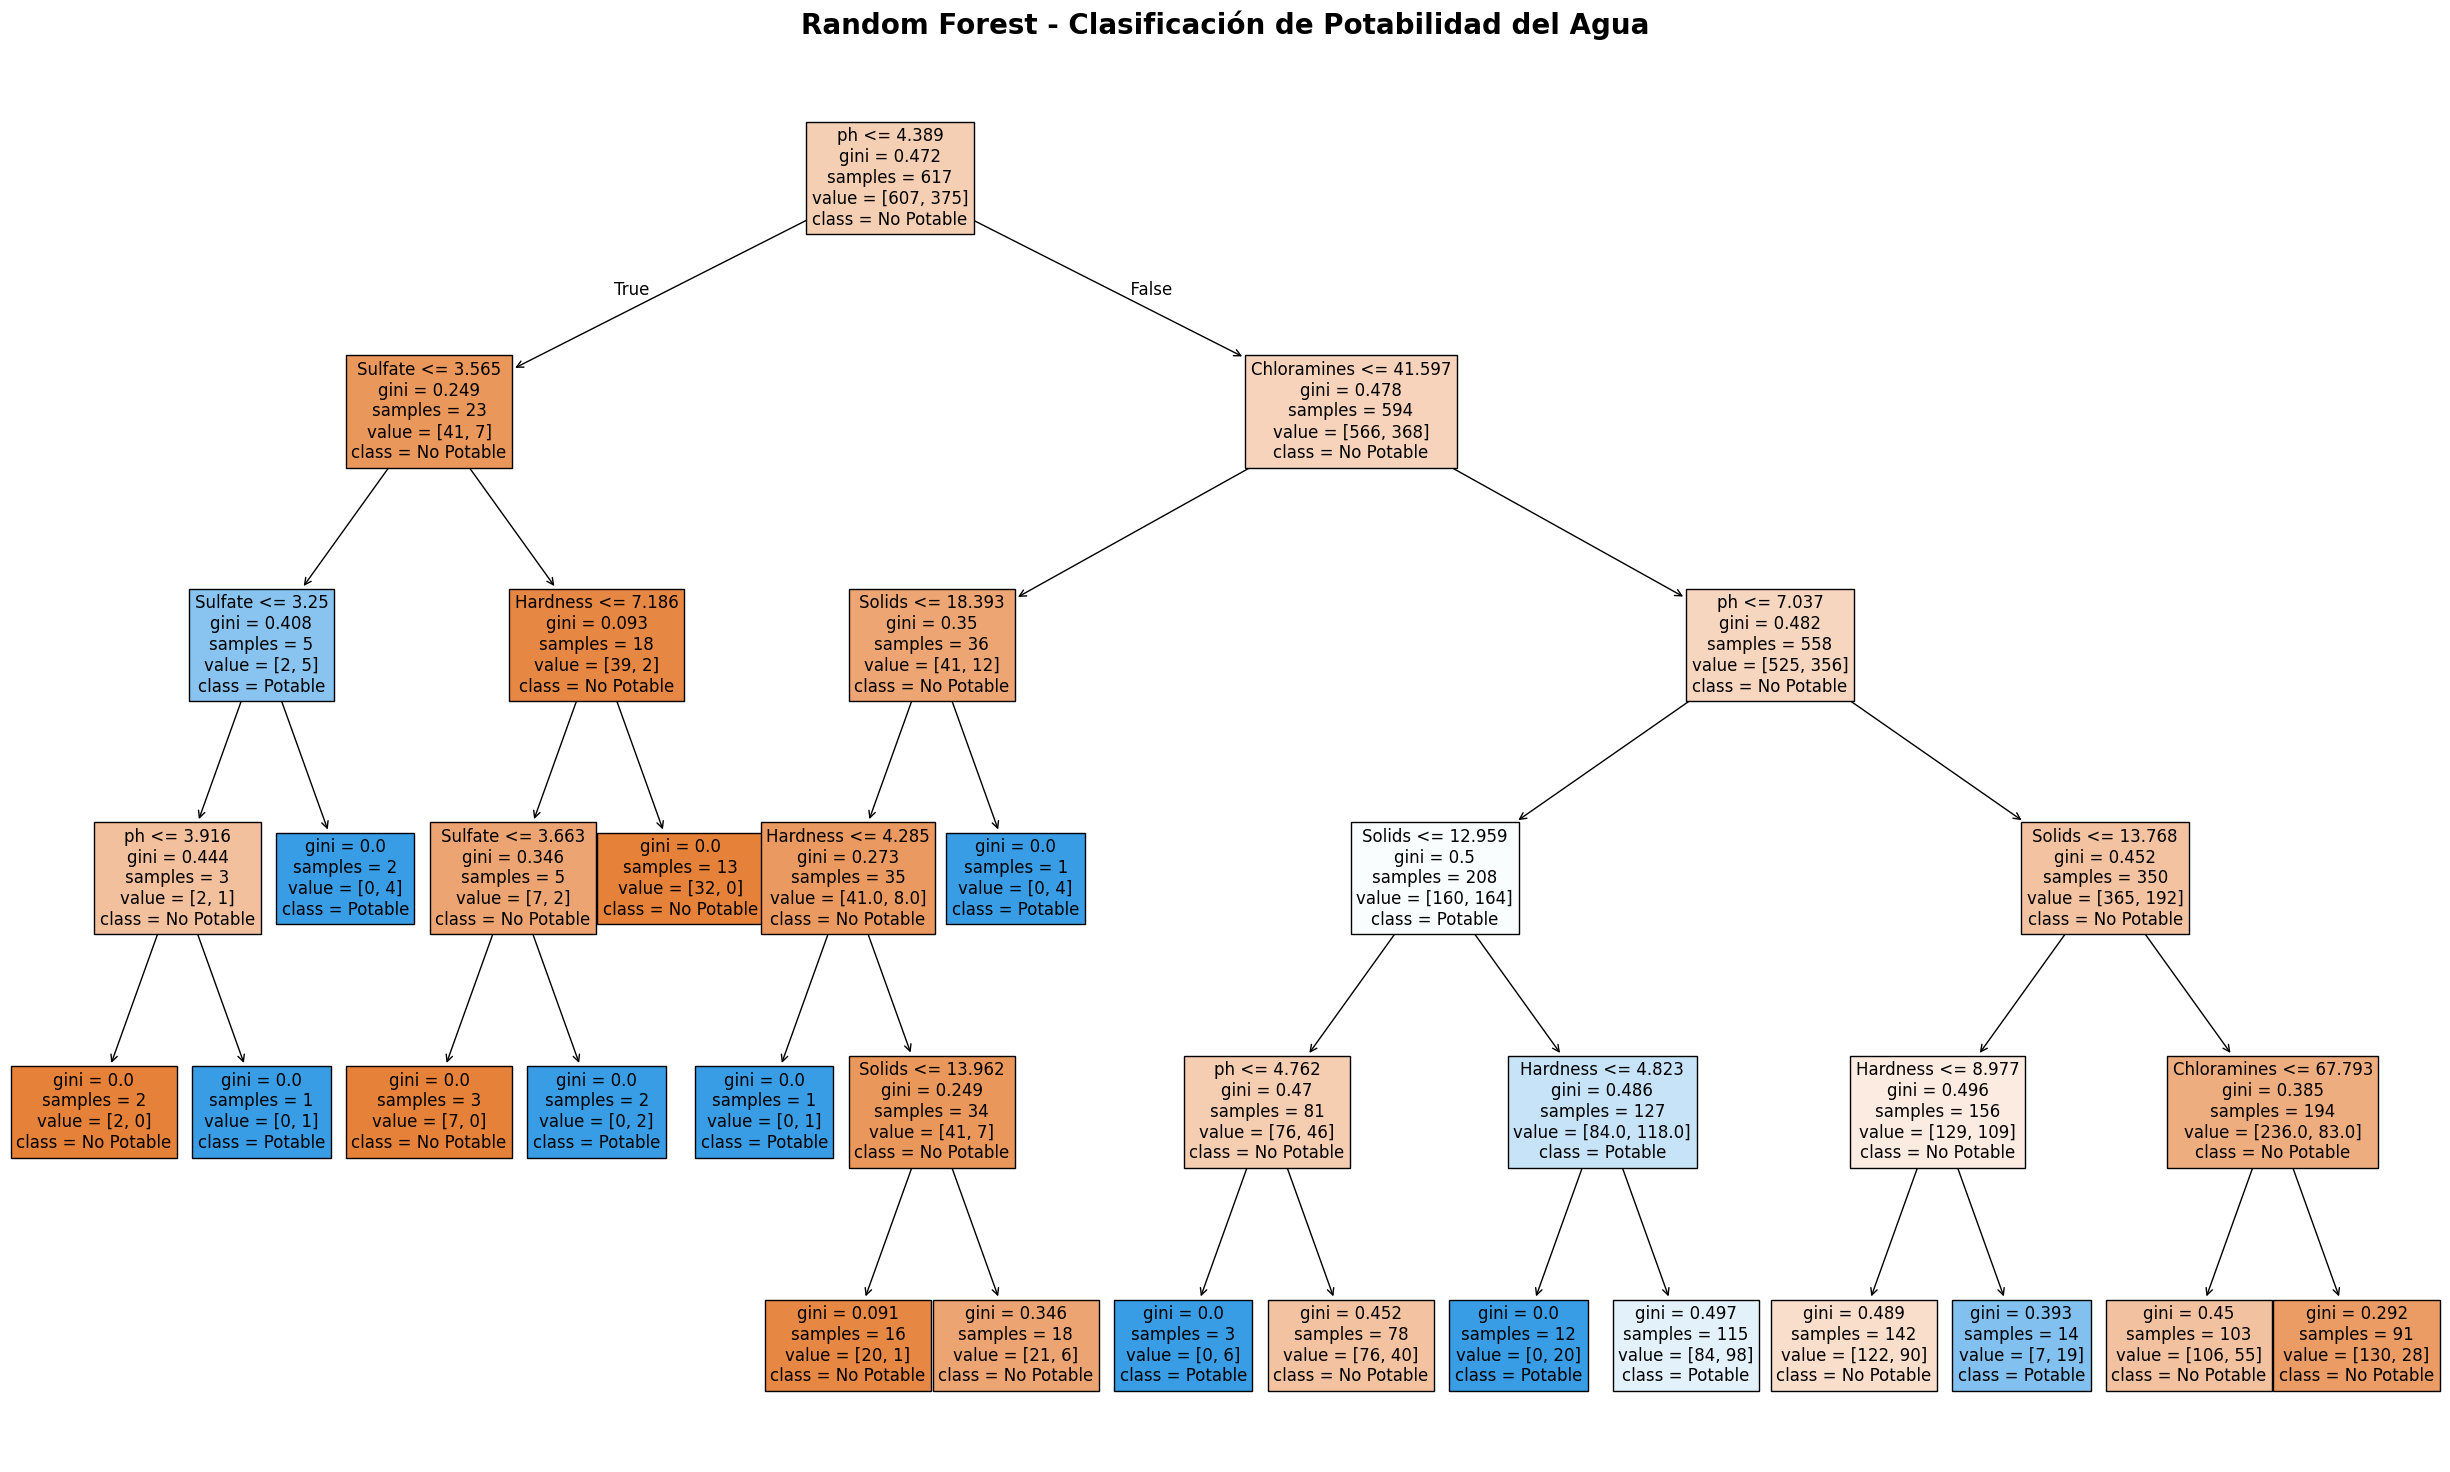

In [166]:
plt.figure(figsize=(25, 15))
plot_tree(rf_model.estimators_[0],
          feature_names = df.columns.to_list()[:-1], 
          class_names=["No Potable", "Potable"],  
          filled=True,
          fontsize=12)  

plt.title("Random Forest - Clasificación de Potabilidad del Agua", 
          fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [162]:
# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train_2, y_train_2,
                               cv=cv, scoring='accuracy')

print(f"\nRandom Forest CV Results:")
print(f"CV Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")
print(f"Individual scores: {rf_cv_scores}")


Random Forest CV Results:
CV Accuracy: 0.6079 (+/- 0.0289)
Individual scores: [0.6142132  0.60406091 0.58163265 0.61734694 0.62244898]


In [167]:
# Comparamos los modelos
models_comparison = {
    'Decision Tree model 2': tree_basic_2,
    'Random Forest': rf_model
}

print("\n" + "="*50)
print("Comparamos los modelos")
print("="*50)

for name, model in models_comparison.items():
    cv_scores = cross_val_score(model, X_train_2, y_train_2,
                               cv=cv, scoring='accuracy')
    print(f"{name:15}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Comparamos los modelos
Decision Tree model 2: 0.5906 (+/- 0.0356)
Random Forest  : 0.6079 (+/- 0.0289)


El modelo de random forest supera al modelo de arbol de decisión con un accuracy mayor y ademas es mas estable 